In [1]:
import pandas as pd
import os

### ad

In [2]:
df_ad = pd.read_csv('../data/raw/test/ad.csv', sep=',')
df_ad.shape

(2618159, 6)

In [3]:
ad_cols = list(df_ad.columns)

In [4]:
df_ad.head()

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
0,1,1,\N,5,381,78
1,3,3,\N,5,598,165
2,4,4,\N,5,108,202
3,5,5,\N,5,109,6
4,6,6,\N,5,400,6


In [5]:
df_ad.describe()

,creative_id,ad_id,product_category,advertiser_id
count,2.618159e+06,2.618159e+06,2.618159e+06,2.618159e+06
mean,2.192127e+06,1.888152e+06,7.811626e+00,2.755300e+04
std,1.285008e+06,1.099371e+06,6.765412e+00,1.536021e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.077500e+06,9.400425e+05,2.000000e+00,1.513700e+04
50%,2.188608e+06,1.886218e+06,5.000000e+00,2.530500e+04
75%,3.304232e+06,2.839310e+06,1.800000e+01,3.841600e+04
max,4.445720e+06,3.812202e+06,1.800000e+01,6.296500e+04


#### 缺失值

In [6]:
sum(df_ad['product_id'] == '\\N') / df_ad.shape[0]

0.3722829667716896

In [7]:
sum(df_ad['industry'] == '\\N') / df_ad.shape[0]

0.040014376514184206

#### 枚举可能值

In [8]:
for col in ad_cols:
    print('current col is: ', col)
    print('num of vals is: ', len(df_ad[col].value_counts()))

current col is:  creative_id
num of vals is:  2618159
current col is:  ad_id
num of vals is:  2379475
current col is:  product_id
num of vals is:  34111
current col is:  product_category
num of vals is:  18
current col is:  advertiser_id
num of vals is:  52861
current col is:  industry
num of vals is:  326


### click

In [9]:
df_click = pd.read_csv('../data/raw/test/click_log.csv', sep=',')
df_click.shape

(33585512, 4)

In [10]:
click_cols = list(df_click.columns)

In [11]:
df_click.head()

,time,user_id,creative_id,click_times
0,20,3131989,645764,1
1,20,3131989,1027422,1
2,20,3131989,1106443,1
3,20,3131989,629802,1
4,59,3131989,2839769,1


In [12]:
df_click.describe()

,time,user_id,creative_id,click_times
count,3.358551e+07,3.358551e+07,3.358551e+07,3.358551e+07
mean,4.797323e+01,3.499714e+06,1.674632e+06,1.066196e+00
std,2.593779e+01,2.883313e+05,1.308090e+06,3.561287e-01
min,1.000000e+00,3.000001e+06,1.000000e+00,1.000000e+00
25%,2.600000e+01,3.249486e+06,4.158050e+05,1.000000e+00
50%,4.900000e+01,3.500907e+06,1.506880e+06,1.000000e+00
75%,7.100000e+01,3.748320e+06,2.737762e+06,1.000000e+00
max,9.100000e+01,4.000000e+06,4.445720e+06,1.850000e+02


#### 点击异常值

In [13]:
print(dict(df_click['click_times'].value_counts()))

{1: 31695705, 2: 1706687, 3: 108696, 4: 51499, 5: 10133, 6: 4737, 7: 2280, 8: 2187, 9: 875, 10: 586, 11: 390, 12: 295, 13: 224, 14: 189, 15: 136, 16: 118, 17: 83, 18: 82, 20: 70, 21: 45, 19: 45, 22: 37, 24: 27, 26: 27, 25: 26, 29: 26, 23: 25, 30: 21, 27: 16, 28: 15, 31: 14, 35: 12, 34: 11, 33: 11, 32: 11, 37: 10, 39: 9, 36: 8, 42: 8, 41: 7, 46: 7, 40: 7, 38: 7, 48: 6, 47: 6, 54: 6, 76: 5, 43: 5, 61: 4, 53: 4, 49: 3, 80: 3, 72: 3, 59: 3, 79: 3, 50: 3, 45: 3, 55: 2, 73: 2, 103: 2, 97: 2, 57: 2, 87: 2, 84: 2, 127: 2, 77: 2, 67: 2, 66: 2, 65: 2, 51: 2, 52: 2, 58: 2, 133: 1, 146: 1, 113: 1, 124: 1, 158: 1, 122: 1, 121: 1, 120: 1, 119: 1, 88: 1, 108: 1, 106: 1, 96: 1, 94: 1, 90: 1, 82: 1, 167: 1, 44: 1, 69: 1, 60: 1, 185: 1}


In [14]:
df_click['click_times'].quantile(q=0.99)

2.0

In [15]:
df_click['click_times'] = df_click['click_times'].apply(lambda x: x if x <= 4 else 4)
df_click.shape

(33585512, 4)

#### 枚举可能值

In [16]:
for col in click_cols:
    print('current col is: ', col)
    print('num of vals is: ', len(df_click[col].value_counts()))

current col is:  time
num of vals is:  91
current col is:  user_id
num of vals is:  1000000
current col is:  creative_id
num of vals is:  2618159
current col is:  click_times
num of vals is:  4


In [17]:
df_click.sample(5)

,time,user_id,creative_id,click_times
1424591,51,3215987,2177354,1
32150174,58,3046831,2360757,1
24657214,65,3596996,3161638,1
5192983,47,3441357,783522,2
16126808,35,3088233,1251649,1


In [18]:
df_click.groupby('click_times')['user_id'].count().plot.bar()

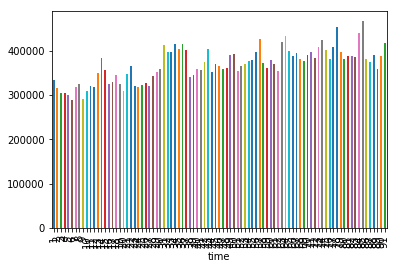

In [19]:
df_click.groupby('time')['user_id'].count().plot.bar()

#### 用户维度

In [20]:
df_click_user = df_click['user_id'].value_counts().to_frame(name='user_record').reset_index()
df_click_user.shape

(1000000, 2)

In [21]:
df_click_user.head()

,index,user_record
0,3648518,113974
1,3834944,26609
2,3093561,25506
3,3206914,18178
4,3522917,11116


In [22]:
df_click_user['user_record'].quantile(q=0.01)

9.0

In [23]:
df_click_user['user_record'].quantile(q=0.5)

24.0

In [24]:
df_click_user['user_record'].quantile(q=0.99)

157.0

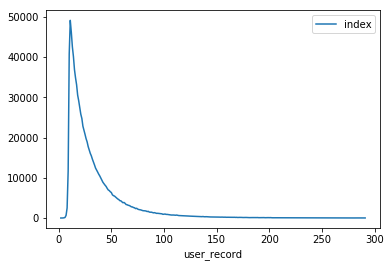

In [25]:
df_click_user[df_click_user['user_record'] <= 291].groupby('user_record').count().plot()

##### 用户观看j记录，需截断

In [26]:
df_click_user[df_click_user['user_record'] <= 100].shape[0] / df_click_user.shape[0]

0.963379

#### 广告维度，需关联广告信息

In [27]:
df_click_creative = df_click['creative_id'].value_counts().to_frame(name='creative_record').reset_index()
df_click_creative.shape

(2618159, 2)

In [28]:
df_click_creative.head()

,index,creative_record
0,108133,113726
1,37298,94456
2,304118,82604
3,1837000,78290
4,12838,77209


In [29]:
df_click_creative['creative_record'].quantile(q=0.01)

1.0

In [30]:
df_click_creative['creative_record'].quantile(q=0.99)

148.0

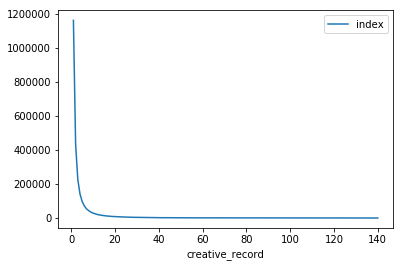

In [31]:
df_click_creative[df_click_creative['creative_record'] <= 140].groupby('creative_record').count().plot()